In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit

# Importando os dados

Dados previamente tratados.
Foram importados 7 índices (IPCA, SELIC, IGPM, VIX, INCC, IEE, IBOV)

In [3]:
#importar csv - INDÍCES =
ipca = pd.read_csv('clean_data\\ipca.csv', sep=';')
#definir index ipca como coluna Unnamed: 0
ipca = ipca.set_index('DATA')
#transformar index em datetime
ipca.index = pd.to_datetime(ipca.index, format='%Y-%m-%d')
ipca['IPCA'] = ipca['IPCA'].astype(float)
print(ipca.head())

selic = pd.read_csv('clean_data\\selic.csv', sep=';')
selic = selic.set_index('DATA')
selic.index = pd.to_datetime(selic.index, format='%Y-%m-%d')
selic['SELIC'] = selic['SELIC'].astype(float)
print(selic.head())

igpm = pd.read_csv('clean_data\\igpm.csv', sep=';')
igpm = igpm.set_index('DATA')
igpm.index = pd.to_datetime(igpm.index, format='%Y-%m-%d')
igpm['IGPM'] = igpm['IGPM'].astype(float)
print(igpm.head())

vix_data = pd.read_csv("clean_data\\VIX.csv", header=0, sep=";")
vix = vix_data.set_index('DATE')
vix.index = pd.to_datetime(vix.index)
vix['CLOSE'] = vix['CLOSE'].astype(float)
vix = vix.rename(columns={'CLOSE': 'VIX'})
print(vix.head())

#incc
incc = pd.read_csv('clean_data\\incc.csv', sep=';', index_col=0, header=0)
incc.index = pd.to_datetime(incc.index, format='%Y-%m-%d')
incc['Valor'] = incc['Valor'].astype(float)
incc = incc.rename(columns={'Valor':'INCC'})
print(incc.head())

#IEE
iee = pd.read_csv('clean_data\\iee.csv', sep=';', index_col=0, header=0)
iee.index = pd.to_datetime(iee.index, format='%Y-%m-%d')
iee = iee.rename(columns={'Valor': 'IEE'})
print(iee.head())

#IBOV
ibov = pd.read_csv('clean_data\\ibov.csv', sep=';', index_col=0, header=0)
ibov.index = pd.to_datetime(ibov.index, format='%Y-%m-%d')
ibov = ibov.rename(columns={'Close': 'IBOV'})
print(ibov.head())


dict_indices = {'ipca': ipca, 'selic': selic, 'igpm': igpm, 'vix': vix, 'ibov': ibov, 'incc': incc, 'iee': iee}
#transformar o dict_indices em um dataframe
df_indices = pd.concat(dict_indices.values(), axis=1)

            IPCA
DATA            
2011-03-31  0.79
2011-06-30  0.15
2011-09-30  0.53
2011-12-31  0.50
2012-03-31  0.21
            SELIC
DATA             
2011-03-31  11.67
2011-06-30  12.17
2011-09-30  11.90
2011-12-31  10.90
2012-03-31   9.65
            IGPM
DATA            
2011-03-31  0.62
2011-06-30 -0.18
2011-09-30  0.65
2011-12-31 -0.12
2012-03-31  0.43
              VIX
DATE             
2011-03-31  17.74
2011-06-30  16.52
2011-09-30  42.96
2011-12-31  23.40
2012-03-31  15.50
            INCC
Data            
2011-03-31  0.43
2011-06-30  0.37
2011-09-30  0.14
2011-12-31  0.11
2012-03-31  0.51
                 IEE
Data                
2011-03-31  29892.13
2011-06-30  30073.77
2011-09-30  27810.66
2011-12-31  32613.71
2012-03-31  35281.68
               IBOV
DATE               
2011-03-31  68587.0
2011-06-30  62404.0
2011-09-30  52324.0
2011-12-31  56754.0
2012-03-31  64511.0


Importação de dados das companhias de transmissão selecionadas:
* ELET4
* TRPL4
* TAEE4
* ALUP4

In [4]:
dict_empresas = {"eletrobras": pd.read_csv('clean_data\\dados_trimestrais_completos_2437.csv', sep=';', index_col=0),
        "tpaulista": pd.read_csv('clean_data\\dados_trimestrais_completos_18376.csv', sep=';', index_col=0),
        "taesa": pd.read_csv('clean_data\\dados_trimestrais_completos_20257.csv', sep=';', index_col=0),
        "alupar": pd.read_csv('clean_data\\dados_trimestrais_completos_21490.csv', sep=';', index_col=0),
    }

for key in dict_empresas.keys():
    dict_empresas[key] = dict_empresas[key].rename(columns={'3.01':'Receita de venda', '3.02':'Custos dos bens vendidos', '3.03': 'Resultado bruto',
                                                   '3.04':'Receitas/Despesas Operacionais', '3.05':'Result antes do financeiro e imp', '3.06': 'Resultado financeiro',
                                                   '3.07':'Resultado antes dos tributos', '3.08':'Imposto de renda', '3.09':'Resultado Líquido Recorrente',
                                                   '3.10': 'Resultado Líquido Não Recorrente', '3.11': 'Lucro Prejuízo'})
    print(dict_empresas[key].pop('3.99'))


print(dict_empresas['eletrobras'].head())

DT_FIM_EXERC
2011-03-31    0.0
2011-06-30    0.0
2011-09-30    0.0
2011-12-31    0.0
2012-03-31    0.0
2012-06-30    0.0
2012-09-30    0.0
2012-12-31    0.0
2013-03-31    0.0
2013-06-30    0.0
2013-09-30    0.0
2013-12-31    0.0
2014-03-31    0.0
2014-06-30    0.0
2014-09-30    0.0
2014-12-31    0.0
2015-03-31    0.0
2015-06-30    0.0
2015-09-30    0.0
2015-12-31    0.0
2016-03-31    0.0
2016-06-30    0.0
2016-09-30    0.0
2016-12-31    0.0
2017-03-31    0.0
2017-06-30    0.0
2017-09-30    0.0
2017-12-31    0.0
2018-03-31    0.0
2018-06-30    0.0
2018-09-30    0.0
2018-12-31    0.0
2019-03-31    0.0
2019-06-30    0.0
2019-09-30    0.0
2019-12-31    0.0
2020-03-31    0.0
2020-06-30    0.0
2020-09-30    0.0
2020-12-31    0.0
2021-03-31    0.0
2021-06-30    0.0
2021-09-30    0.0
2021-12-31    0.0
2022-03-31    0.0
2022-06-30    0.0
2022-09-30    0.0
2022-12-31    0.0
2023-03-31    0.0
2023-06-30    0.0
2023-09-30    0.0
2023-12-31    0.0
2024-03-31    0.0
Name: 3.99, dtype: float64
DT_FIM

# Padronização dos dados

In [5]:
def standarization_time_series(serie):
    """
    Padroniza uma série temporal (z-score normalization).

    Parâmetros:
    serie (pd.Series): Série temporal a ser padronizada.

    Retorno:
    pd.Series: Série temporal padronizada.
    """
    mean = serie.mean()
    std_deviation = serie.std()
    
    standard_series = (serie - mean) / std_deviation
    print(f"Standarization completed with success - matrix shape {np.shape(standard_series)}")

    return standard_series

In [6]:
for empresa in dict_empresas.keys():
    for indicador in dict_empresas[empresa]:
        print(f"{empresa} - {indicador}")
        dict_empresas[empresa][indicador] = standarization_time_series(dict_empresas[empresa][indicador])


eletrobras - Receita de venda
Standarization completed with success - matrix shape (53,)
eletrobras - Custos dos bens vendidos
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado bruto
Standarization completed with success - matrix shape (53,)
eletrobras - Receitas/Despesas Operacionais
Standarization completed with success - matrix shape (53,)
eletrobras - Result antes do financeiro e imp
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado financeiro
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado antes dos tributos
Standarization completed with success - matrix shape (53,)
eletrobras - Imposto de renda
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado Líquido Recorrente
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado Líquido Não Recorrente
Standarization completed with success - matrix shape (53,)
eletrobras - Lucro Prejuízo
S

In [7]:
for indice in df_indices.columns:
    print(f'{indice}')
    df_indices[indice] = standarization_time_series(df_indices[indice])

IPCA
Standarization completed with success - matrix shape (53,)
SELIC
Standarization completed with success - matrix shape (53,)
IGPM
Standarization completed with success - matrix shape (53,)
VIX
Standarization completed with success - matrix shape (53,)
IBOV
Standarization completed with success - matrix shape (53,)
INCC
Standarization completed with success - matrix shape (53,)
IEE
Standarization completed with success - matrix shape (53,)


# Data exploratory
Visualização de dados

In [8]:
print(df_indices.describe())

#categ = df_indices.dtype[df_indices.dtype == 'object'].index
#df_indices[categ].describe()

               IPCA         SELIC          IGPM           VIX          IBOV  \
count  5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01   
mean  -2.094760e-18  5.121689e-16  4.608473e-17 -2.094760e-16  1.424437e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.939037e+00 -2.033923e+00 -2.600191e+00 -1.162442e+00 -1.312729e+00   
25%   -7.384649e-01 -8.183703e-01 -4.590022e-01 -6.142832e-01 -9.204327e-01   
50%   -4.213327e-02  1.945904e-01 -3.679604e-02 -2.625376e-01 -2.409648e-01   
75%    6.301869e-01  8.698975e-01  3.150424e-01  1.803538e-01  9.244100e-01   
max    2.647147e+00  1.275082e+00  3.702744e+00  4.489880e+00  1.997158e+00   

               INCC           IEE  
count  5.300000e+01  5.300000e+01  
mean  -7.331661e-18 -3.016455e-16  
std    1.000000e+00  1.000000e+00  
min   -8.988098e-01 -1.072948e+00  
25%   -7.096242e-01 -9.028627e-01  
50%   -3.690903e-01 -4.527553e-01  
75%    3.119777e-01  1.122665e+00  


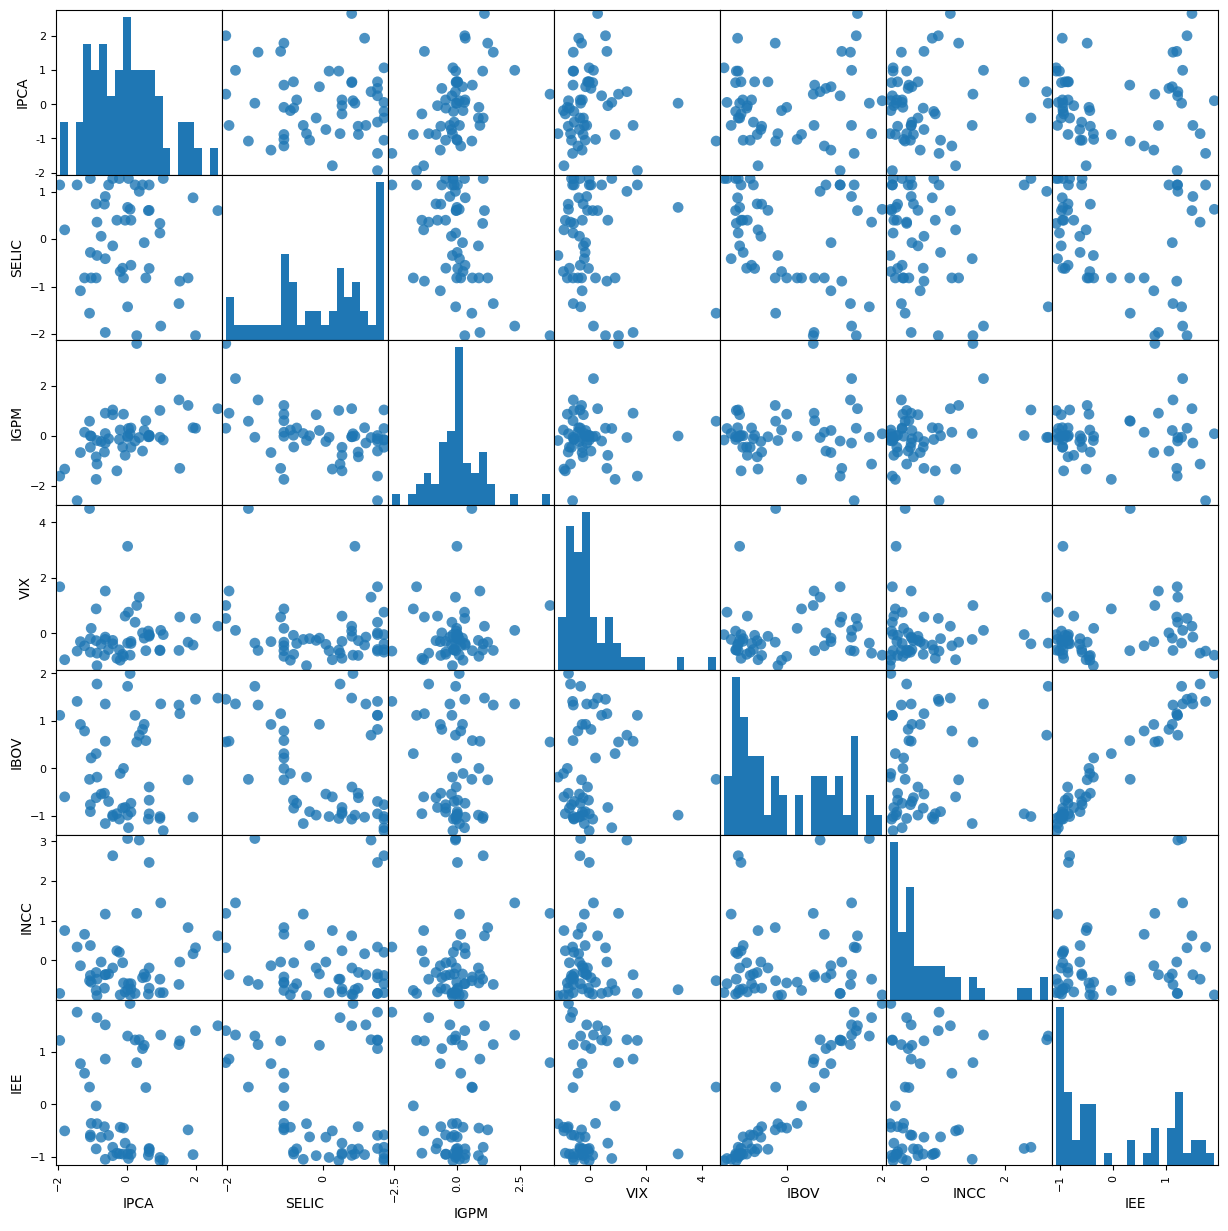

In [9]:
ax2 = pd.plotting.scatter_matrix(df_indices, alpha=0.8, figsize=(15, 15), marker='o',  hist_kwds={'bins': 20}, s=60)
# diagonal='kde'

In [10]:
dict_empresas['eletrobras'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 2011-03-31 to 2024-03-31
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Receita de venda                  53 non-null     float64
 1   Custos dos bens vendidos          53 non-null     float64
 2   Resultado bruto                   53 non-null     float64
 3   Receitas/Despesas Operacionais    53 non-null     float64
 4   Result antes do financeiro e imp  53 non-null     float64
 5   Resultado financeiro              53 non-null     float64
 6   Resultado antes dos tributos      53 non-null     float64
 7   Imposto de renda                  53 non-null     float64
 8   Resultado Líquido Recorrente      53 non-null     float64
 9   Resultado Líquido Não Recorrente  53 non-null     float64
 10  Lucro Prejuízo                    53 non-null     float64
dtypes: float64(11)
memory usage: 5.0+ KB


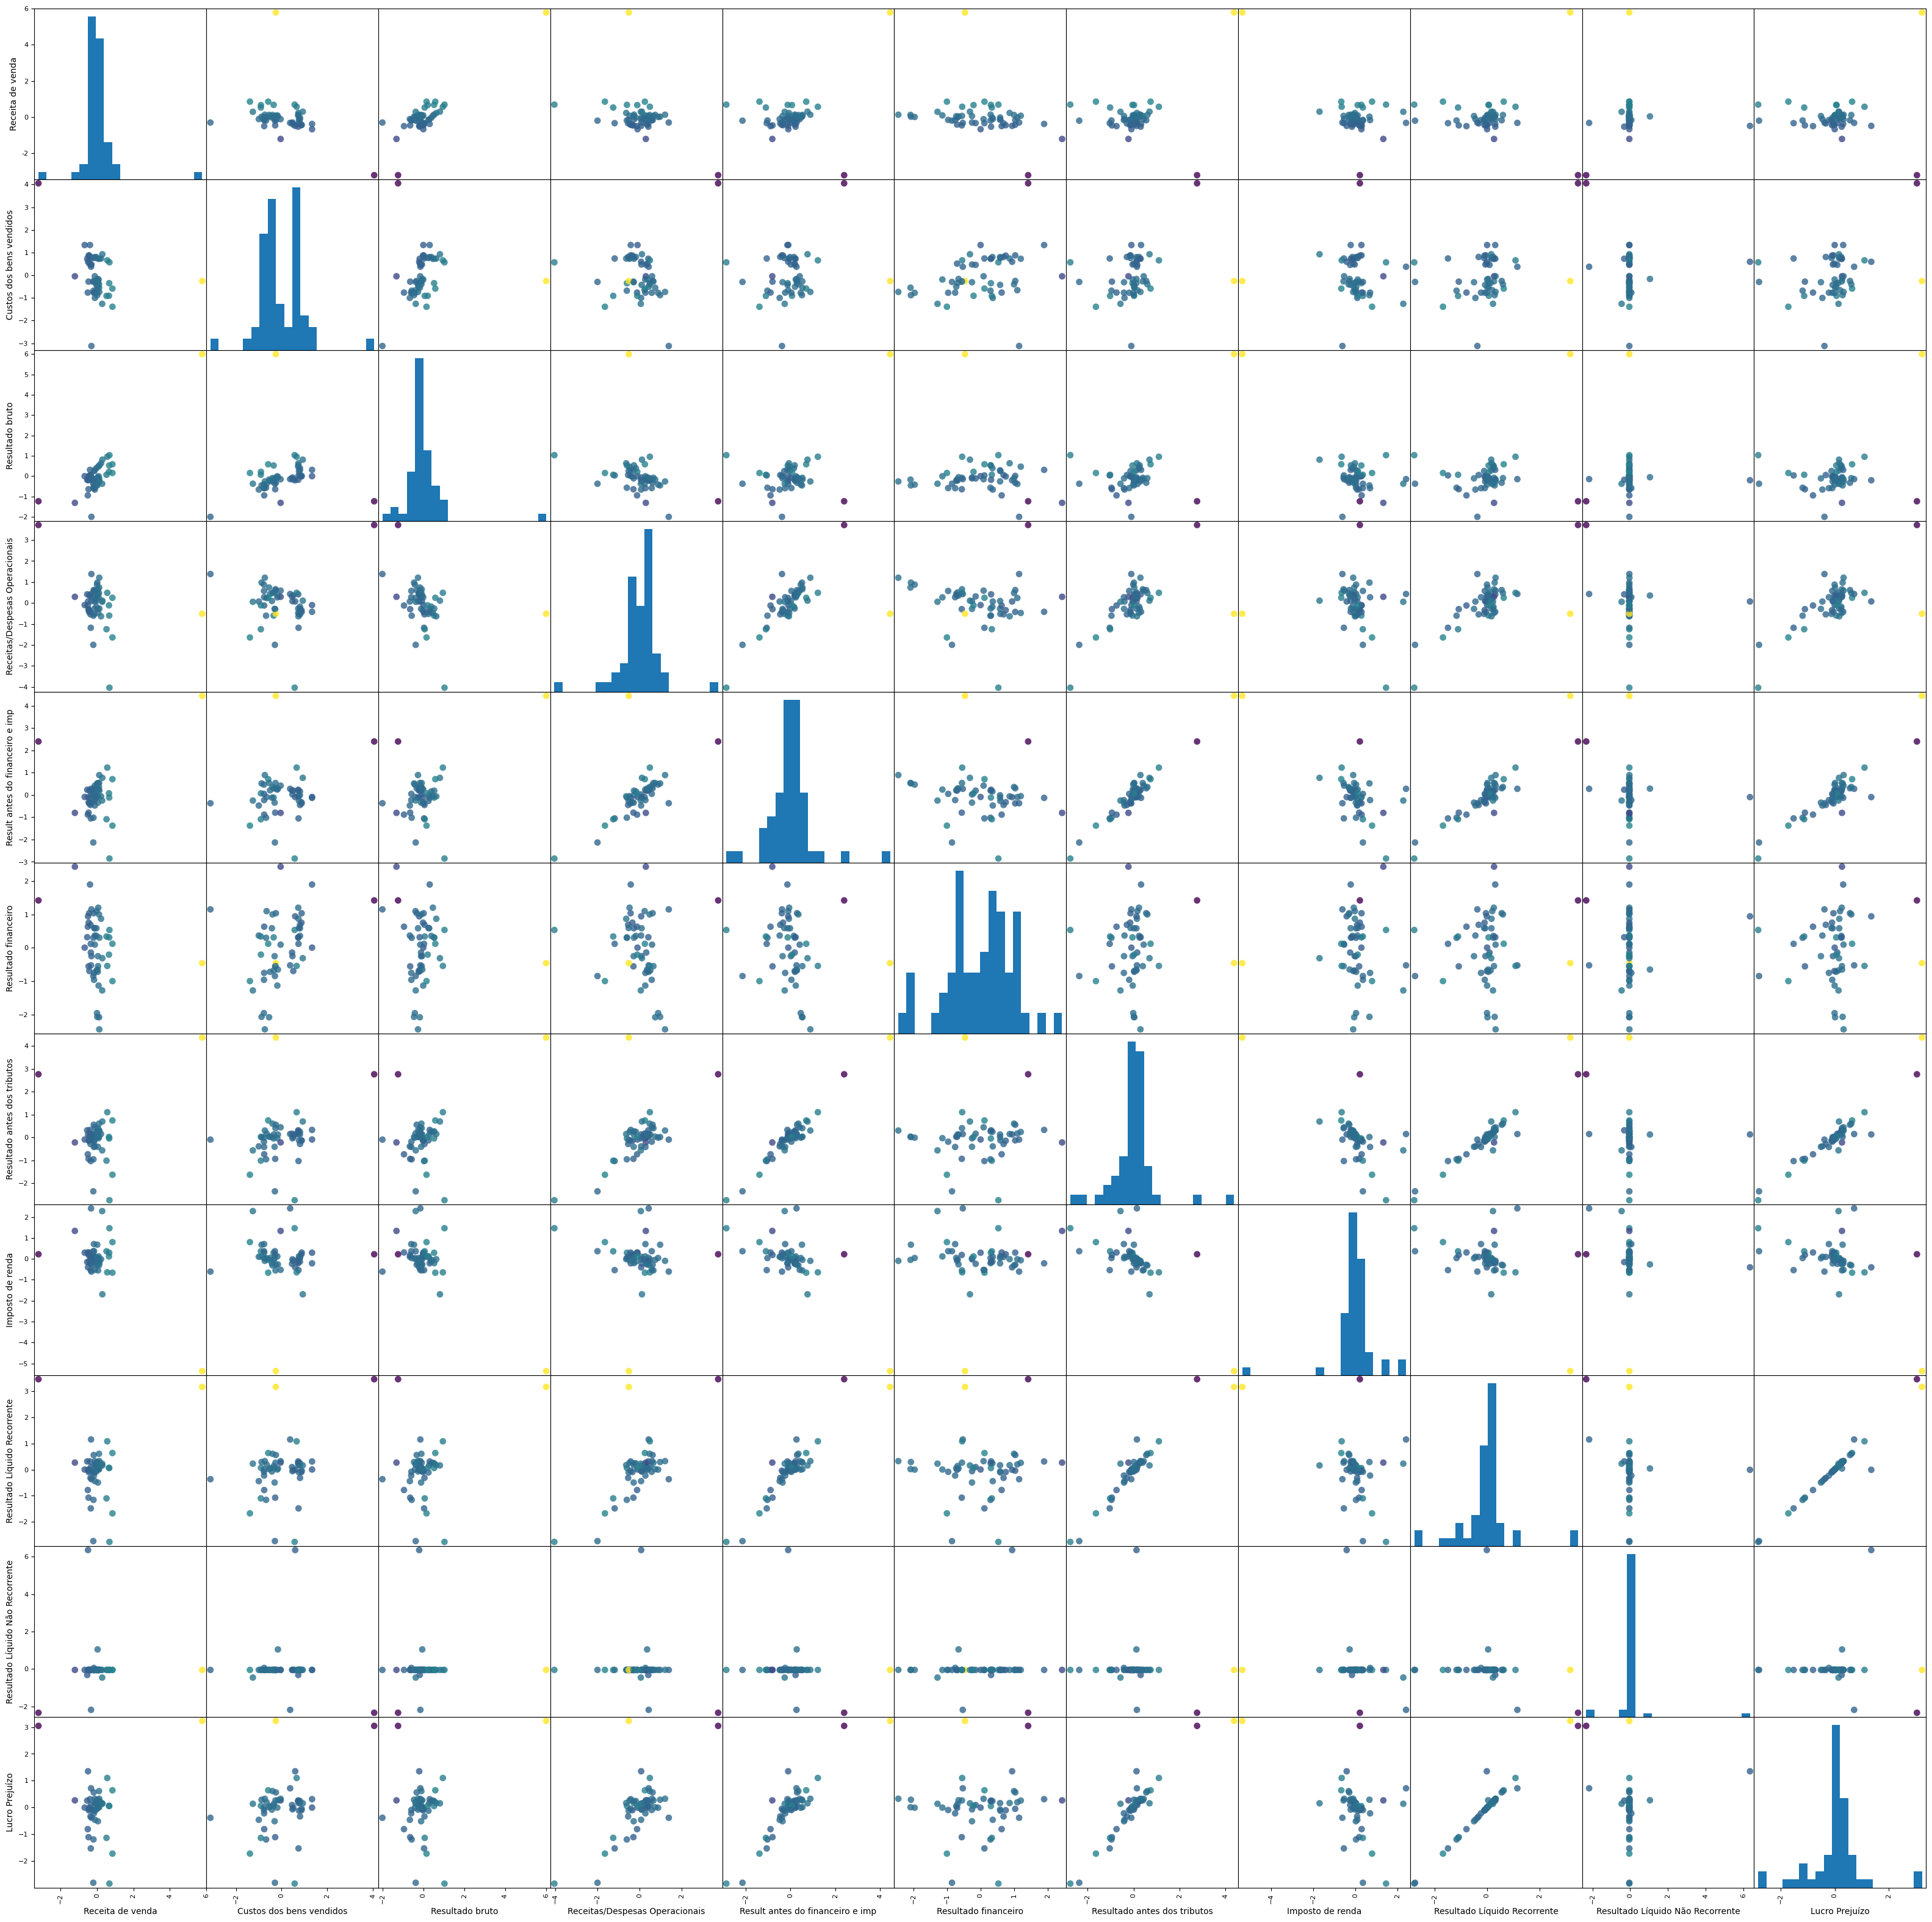

In [11]:
y = dict_empresas['eletrobras']["Receita de venda"]
ax1 = pd.plotting.scatter_matrix(dict_empresas['eletrobras'], alpha=0.8, figsize=(40, 40), marker='o',  hist_kwds={'bins': 20}, s=60, c=y)

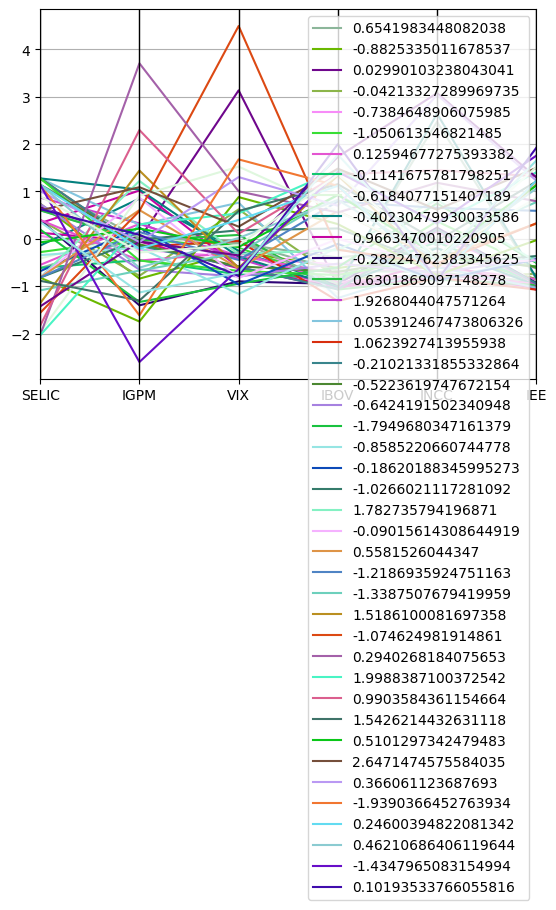

In [ ]:
#ax3 = pd.plotting.parallel_coordinates(df_indices, "IPCA")

# Método para gerar 4 lags (correspondente a 1 ano) 
* Referente a índices e indicadores

In [13]:
def creating_lag_matrix(time_series, lag):
    n = len(time_series)
    time_series_lagged = np.zeros((n-lag, lag))
    for i in range(lag, n):
        time_series_lagged[i-lag] = time_series[i-lag:i]

    print(f'Matrix {np.shape(time_series_lagged)} created with success')
    return time_series_lagged

In [14]:
# Criando matrizes com lags para cada indicador de empresas
dict_empresas_lagged = {}
for empresa in dict_empresas.keys():
    # Inicializando o dicionário para a empresa, caso ainda não exista
    if empresa not in dict_empresas_lagged:
        dict_empresas_lagged[empresa] = {}

    for indicador in dict_empresas[empresa].columns:
        time_series = dict_empresas[empresa][indicador].values

        # cria uma matriz de tamanho nx4
        print(f'Creating lagged indicator matrix - {empresa} - {indicador}')
        dict_empresas_lagged[empresa][indicador] = creating_lag_matrix(time_series, 4)


Creating lagged indicator matrix - eletrobras - Receita de venda
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Custos dos bens vendidos
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado bruto
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Receitas/Despesas Operacionais
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Result antes do financeiro e imp
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado financeiro
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado antes dos tributos
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Imposto de renda
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado Líquido Recorrente
Matrix (49, 4) created with success
Creating lagged indicator 

In [15]:
# Criando matrizes de lags para os índices macro econômicos
dict_indices_lagged = {}
for indice in df_indices.columns:
    time_series = df_indices[indice].values
    #cria uma matriz de tamanho nx4
    print(f'Creating lagged index matrix - {indice}')
    dict_indices_lagged[indice] = creating_lag_matrix(time_series, 4)

Creating lagged index matrix - IPCA
Matrix (49, 4) created with success
Creating lagged index matrix - SELIC
Matrix (49, 4) created with success
Creating lagged index matrix - IGPM
Matrix (49, 4) created with success
Creating lagged index matrix - VIX
Matrix (49, 4) created with success
Creating lagged index matrix - IBOV
Matrix (49, 4) created with success
Creating lagged index matrix - INCC
Matrix (49, 4) created with success
Creating lagged index matrix - IEE
Matrix (49, 4) created with success


# Feature Selection

In [16]:
def apply_rfe(X, y, n_features_to_select=10):
    """
    Applies Recursive Feature Elimination (RFE) to a given time series dataset.
    
    Parameters:
    X (pd.DataFrame): The input features of the time series.
    y (pd.Series): The output target variable of the time series.
    n_features_to_select (int): Number of top features to select.
    
    Returns:
    pd.DataFrame: DataFrame with selected features.
    """
    # Define the model (RandomForestRegressor in this case)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Initialize RFE with the model
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    
    # Fit the RFE model
    rfe.fit(X, y)
    
    # Get the selected features
    print(rfe.support_)
    selected_features = X.columns[rfe.support_]
    
    # Return the DataFrame with only the selected features
    return X[selected_features]

In [17]:
df_indices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2011-03-31 to 2024-03-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IPCA    53 non-null     float64
 1   SELIC   53 non-null     float64
 2   IGPM    53 non-null     float64
 3   VIX     53 non-null     float64
 4   IBOV    53 non-null     float64
 5   INCC    53 non-null     float64
 6   IEE     53 non-null     float64
dtypes: float64(7)
memory usage: 3.3 KB


In [18]:
#loop para agrupar lags de índices
x_indices = pd.DataFrame()
for indice in df_indices.columns[:]:
    x = pd.DataFrame(dict_indices_lagged[indice])
    x.columns = [f'{indice} - Lag 4', f'{indice} - Lag 3', f'{indice} - Lag 2', f'{indice} - Lag 1']
    x_indices = pd.concat([x_indices, x], axis=1)

print(f"Matriz de índices criada com dimensões: {np.shape(x_indices)}")
x_indices.head()    

Matriz de índices criada com dimensões: (49, 28)


,IPCA - Lag 4,IPCA - Lag 3,IPCA - Lag 2,IPCA - Lag 1,SELIC - Lag 4,SELIC - Lag 3,SELIC - Lag 2,SELIC - Lag 1,IGPM - Lag 4,IGPM - Lag 3,...,IBOV - Lag 2,IBOV - Lag 1,INCC - Lag 4,INCC - Lag 3,INCC - Lag 2,INCC - Lag 1,IEE - Lag 4,IEE - Lag 3,IEE - Lag 2,IEE - Lag 1
0,0.654198,-0.882534,0.029901,-0.042133,0.605177,0.740239,0.667305,0.397183,-0.036796,-0.840998,...,-0.985730,-0.824308,-0.198823,-0.312335,-0.747461,-0.804217,-0.855998,-0.848254,-0.944735,-0.739972
1,-0.882534,0.029901,-0.042133,-0.738465,0.740239,0.667305,0.397183,0.059529,-0.840998,-0.006638,...,-0.824308,-0.541655,-0.312335,-0.747461,-0.804217,-0.047475,-0.848254,-0.944735,-0.739972,-0.626232
2,0.029901,-0.042133,-0.738465,-1.050614,0.667305,0.397183,0.059529,-0.280826,-0.006638,-0.780683,...,-0.541655,-0.911724,-0.747461,-0.804217,-0.047475,0.368733,-0.944735,-0.739972,-0.626232,-0.620494
3,-0.042133,-0.738465,-1.050614,0.125947,0.397183,0.059529,-0.280826,-0.550949,-0.780683,-0.227794,...,-0.911724,-0.736054,-0.804217,-0.047475,0.368733,-0.596113,-0.739972,-0.626232,-0.620494,-0.847510
4,-0.738465,-1.050614,0.125947,0.654198,0.059529,-0.280826,-0.550949,-0.618479,-0.227794,0.003414,...,-0.736054,-0.671339,-0.047475,0.368733,-0.596113,-0.709624,-0.626232,-0.620494,-0.847510,-0.902863


In [19]:
#loop para agrupar lags de indicadores
x_indicadores = pd.DataFrame()
for indicador in dict_empresas_lagged['eletrobras'].keys():
    x = pd.DataFrame(dict_empresas_lagged['eletrobras'][indicador])
    x.columns = [f'{indicador} - Lag 4', f'{indicador} - Lag 3', f'{indicador} - Lag 2', f'{indicador} - Lag 1']
    x_indicadores = pd.concat([x_indicadores, x], axis=1)

print(f"Matriz de índices criada com dimensões: {np.shape(x_indicadores)}")
x_indicadores.head()    

Matriz de índices criada com dimensões: (49, 44)


,Receita de venda - Lag 4,Receita de venda - Lag 3,Receita de venda - Lag 2,Receita de venda - Lag 1,Custos dos bens vendidos - Lag 4,Custos dos bens vendidos - Lag 3,Custos dos bens vendidos - Lag 2,Custos dos bens vendidos - Lag 1,Resultado bruto - Lag 4,Resultado bruto - Lag 3,...,Resultado Líquido Recorrente - Lag 2,Resultado Líquido Recorrente - Lag 1,Resultado Líquido Não Recorrente - Lag 4,Resultado Líquido Não Recorrente - Lag 3,Resultado Líquido Não Recorrente - Lag 2,Resultado Líquido Não Recorrente - Lag 1,Lucro Prejuízo - Lag 4,Lucro Prejuízo - Lag 3,Lucro Prejuízo - Lag 2,Lucro Prejuízo - Lag 1
0,-0.037334,-0.674382,-0.382505,0.672842,0.804533,1.332752,1.332752,-0.349234,0.392635,0.000325,...,0.315358,0.063245,-0.047282,-0.047282,-0.047282,-0.047282,0.241918,-0.002829,0.311981,0.054490
1,-0.674382,-0.382505,0.672842,0.133248,1.332752,1.332752,-0.349234,0.729006,0.000325,0.310099,...,0.063245,0.242591,-0.047282,-0.047282,-0.047282,-0.047282,-0.002829,0.311981,0.054490,0.237661
2,-0.382505,0.672842,0.133248,0.071932,1.332752,-0.349234,0.729006,0.728852,0.310099,0.526464,...,0.242591,0.263580,-0.047282,-0.047282,-0.047282,-0.047282,0.311981,0.054490,0.237661,0.259098
3,0.672842,0.133248,0.071932,0.224474,-0.349234,0.729006,0.728852,0.737064,0.526464,0.533098,...,0.263580,0.174475,-0.047282,-0.047282,-0.047282,-0.047282,0.054490,0.237661,0.259098,0.168092
4,0.133248,0.071932,0.224474,0.685861,0.729006,0.728852,0.737064,0.570318,0.533098,0.467939,...,0.174475,-2.767685,-0.047282,-0.047282,-0.047282,-0.047282,0.237661,0.259098,0.168092,-2.836829


In [20]:
#juntar os dois dataframes
X = pd.concat([x_indices, x_indicadores], axis=1)
print(f"Matriz de índices criada com dimensões: {np.shape(X)}")

Matriz de índices criada com dimensões: (49, 72)


In [21]:
#montar matriz a partir de RFE
#for indicador in dict_empresas['eletrobras'].columns:
y = dict_empresas['eletrobras']["Receita de venda"][4:]
x_features = apply_rfe(X, y, n_features_to_select=20)
x_features.columns

[False False  True False False False False False False  True  True  True
  True  True False False False False  True False  True False False False
 False False  True False False False  True  True  True False False  True
 False False False False False False  True False False False False False
  True False False False False False  True False  True False  True False
 False False  True False False False False False False False  True False]


Index(['IPCA - Lag 2', 'IGPM - Lag 3', 'IGPM - Lag 2', 'IGPM - Lag 1',
       'VIX - Lag 4', 'VIX - Lag 3', 'IBOV - Lag 2', 'INCC - Lag 4',
       'IEE - Lag 2', 'Receita de venda - Lag 2', 'Receita de venda - Lag 1',
       'Custos dos bens vendidos - Lag 4', 'Custos dos bens vendidos - Lag 1',
       'Receitas/Despesas Operacionais - Lag 2',
       'Resultado financeiro - Lag 4', 'Resultado antes dos tributos - Lag 2',
       'Imposto de renda - Lag 4', 'Imposto de renda - Lag 2',
       'Resultado Líquido Recorrente - Lag 2', 'Lucro Prejuízo - Lag 2'],
      dtype='object')

In [22]:
#teste sem RFE
#x_features = X

In [23]:
x_features.iloc[0:]

,IPCA - Lag 2,IGPM - Lag 3,IGPM - Lag 2,IGPM - Lag 1,VIX - Lag 4,VIX - Lag 3,IBOV - Lag 2,INCC - Lag 4,IEE - Lag 2,Receita de venda - Lag 2,Receita de venda - Lag 1,Custos dos bens vendidos - Lag 4,Custos dos bens vendidos - Lag 1,Receitas/Despesas Operacionais - Lag 2,Resultado financeiro - Lag 4,Resultado antes dos tributos - Lag 2,Imposto de renda - Lag 4,Imposto de renda - Lag 2,Resultado Líquido Recorrente - Lag 2,Lucro Prejuízo - Lag 2
0,0.029901,-0.840998,-0.006638,-0.780683,-0.105921,-0.262538,-0.985730,-0.198823,-0.944735,-0.382505,0.672842,0.804533,-0.349234,-0.422692,0.356198,0.328098,-0.129350,-0.211979,0.315358,0.311981
1,-0.042133,-0.006638,-0.780683,-0.227794,-0.262538,3.131679,-0.824308,-0.312335,-0.739972,0.672842,0.133248,1.332752,0.729006,-0.602008,0.003936,-0.045192,0.295920,0.292691,0.063245,0.054490
2,-0.738465,-0.780683,-0.227794,0.003414,3.131679,0.620678,-0.541655,-0.747461,-0.626232,0.133248,0.071932,1.332752,0.728852,-0.269084,1.896509,0.265871,-0.211979,-0.203776,0.242591,0.237661
3,-1.050614,-0.227794,0.003414,0.315042,0.620678,-0.393479,-0.911724,-0.804217,-0.620494,0.071932,0.224474,-0.349234,0.737064,-0.478518,0.311067,0.237493,0.292691,-0.066232,0.263580,0.259098
4,0.125947,0.003414,0.315042,0.023519,-0.393479,-0.190648,-0.736054,-0.047475,-0.847510,0.224474,0.685861,0.729006,0.570318,-0.637244,0.303081,0.147425,-0.203776,-0.014301,0.174475,0.168092
5,0.654198,0.315042,0.023519,-0.448950,-0.190648,-0.363953,-0.671339,0.368733,-0.902863,0.685861,-0.453167,0.728852,0.867787,-4.042547,1.201234,-2.749269,-0.066232,1.467097,-2.767685,-2.836829
6,-0.114168,0.023519,-0.448950,0.093887,-0.363953,-0.069976,-0.838956,-0.596113,-0.947297,-0.453167,-0.430517,0.737064,0.877955,-0.344591,0.869392,-0.146875,-0.014301,0.221734,-0.089817,-0.101837
7,-0.618408,-0.448950,0.093887,0.847826,-0.069976,-0.752927,-1.163076,-0.709624,-1.047193,-0.430517,-0.354903,0.570318,0.806488,-0.428277,0.533836,-0.131076,1.467097,0.301372,-0.038255,-0.049175
8,-0.402305,0.093887,0.847826,-0.056901,-0.752927,-0.218890,-0.985220,-0.066393,-0.977684,-0.354903,-0.339453,0.867787,0.739640,-0.544433,0.753170,-0.288221,0.221734,0.092983,-0.314776,-0.331595
9,0.966347,0.847826,-0.056901,1.018719,-0.218890,-0.252268,-1.015501,1.163313,-1.011233,-0.339453,-0.134097,0.877955,0.800474,-1.184353,1.035098,-1.034653,0.301372,-0.537626,-1.482798,-1.524533


In [24]:
#pegar o último caractere da string x_features.columns[1]
#transformar o último caractere da string em um número inteiro
int(x_features.columns[1][-1])

3

In [25]:
#build a 3d matrix using the x_features array, considering the name of the columns. Array shape is (n_samples, n_features, n_lags) and the lags are defined by the column name
def build_3d_matrix(x_features):
    n_samples = x_features.shape[0]
    n_lags = 4
    n_features = int(x_features.shape[1]/n_lags)
    print(n_samples)
    print(n_features)
    
    x_3d = np.zeros((n_samples, n_lags, n_features))
    
    for i in range(n_samples):
        for j in range(n_lags):
            for k in range(n_features):
                lag = 4 - j
                if(f'Lag {lag}' in x_features.columns[k]):
                    x_3d[i, j, k] = x_features.iloc[i][f'{x_features.columns[k]}']
                
    return x_3d

In [26]:
x_3d_features = build_3d_matrix(x_features)
x_3d_features.shape

49
5


(49, 4, 5)

In [27]:
zero_counter = [0, 0, 0, 0]
for i in range(0, len(x_3d_features[0])):
    for j in range(0, len(x_3d_features[0][0])):
        if x_3d_features[i][0][j] == 0:
            zero_counter[0] += 1
        if x_3d_features[i][1][j] == 0:
            zero_counter[1] += 1
        if x_3d_features[i][2][j] == 0:
            zero_counter[2] += 1
        if x_3d_features[i][3][j] == 0:
            zero_counter[3] += 1
zero_counter
#49 linhas x 20 colunas = 980 registros por lag
#Logo 3 tris antes do valor atual é a maior correlação com o valor do tri a ser previsto

[16, 16, 12, 16]

In [28]:
x_3d_features

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -1.05920921e-01],
        [ 0.00000000e+00, -8.40998241e-01,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 2.99010324e-02,  0.00000000e+00, -6.63846153e-03,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -7.80683076e-01,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00, -2.62537586e-01],
        [ 0.00000000e+00, -6.63846153e-03,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [-4.21332729e-02,  0.00000000e+00, -7.80683076e-01,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -2.27794066e-01,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  3.13167932e+00],
        [ 0.00000000e+00, -7.80683076e-01,  0.00000000e+00,


In [29]:
#imports para treinar o modelo
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [30]:
x_3d_features.shape[1]

4

In [31]:
len(x_3d_features[0:39])
y[39:]

DT_FIM_EXERC
2021-12-31    0.660217
2022-03-31    0.111986
2022-06-30    0.034810
2022-09-30   -0.160467
2022-12-31   -0.167386
2023-03-31    0.118752
2023-06-30    0.127221
2023-09-30    0.017106
2023-12-31    0.287752
2024-03-31    0.002121
Name: Receita de venda, dtype: float64

In [ ]:
y

In [40]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Supondo que x_3d_features e y estejam definidos
# x_3d_features: array 3D de características
# y: array 1D de rótulos

# Definir o número de folds
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=False)

# Armazenar as perdas de cada fold
fold_losses = []
train_losses = []
val_losses = []

# Loop através de cada fold
for train_index, test_index in kf.split(x_3d_features):
    x_train, x_test = x_3d_features[train_index], x_3d_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Verificar a forma dos dados
    print(f'x_train shape: {x_train.shape}')
    print(f'x_test shape: {x_test.shape}')
    print(f'y_train shape: {y_train.shape}')
    print(f'y_test shape: {y_test.shape}')
    
    # Definir a arquitetura do modelo LSTM
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1))
    
    # Compilar o modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    # Treinar o modelo
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    # Armazenar as perdas de treinamento e validação
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    # Avaliar o modelo
    loss = model.evaluate(x_test, y_test, verbose=1)
    print(f'Fold Loss: {loss}')
    fold_losses.append(loss)

# Calcular a perda média e desvio padrão
mean_loss = np.mean(fold_losses)
std_loss = np.std(fold_losses)
print(f'Mean Loss: {mean_loss}')
print(f'Standard Deviation of Loss: {std_loss}')

# Plotar as perdas de treinamento e validação para cada fold
plt.figure(figsize=(12, 8))
for i in range(n_folds):
    plt.plot(train_losses[i], label=f'Train Fold {i+1}')
    plt.plot(val_losses[i], label=f'Val Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

x_train shape: (44, 4, 5)
x_test shape: (5, 4, 5)
y_train shape: (44,)
y_test shape: (5,)
Epoch 1/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step - loss: 1.4636 - val_loss: 0.0180
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4661 - val_loss: 0.0175
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4617 - val_loss: 0.0172
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4576 - val_loss: 0.0169
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4572 - val_loss: 0.0166
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.4535 - val_loss: 0.0165
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.4397 - val_loss: 0.0167
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.4467 - val_loss: 0.0168
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4409 - val_loss: 0.0171
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.3323 - val_loss: 0.0175
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4410 - val_loss: 0.0179
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4401 - val_loss: 0.0184
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 1.3691 - val_loss: 0.0217
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.4778 - val_loss: 0.0215
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.4763 - val_loss: 0.0216
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4656 - val_loss: 0.0217
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4688 - val_loss: 0.0219
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.1163 - val_loss: 0.0221
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4527 - val_loss: 0.0221
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.3417 - val_loss: 0.0222
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4584 - val_loss: 0.0222
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4602 - val_loss: 0.0220
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.4526 - val_loss: 0.0219
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.3520 - val_loss: 0.0217
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - loss: 1.4715 - val_loss: 0.0185
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4672 - val_loss: 0.0180
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4626 - val_loss: 0.0180
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4505 - val_loss: 0.0179
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4452 - val_loss: 0.0176
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4527 - val_loss: 0.0173
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4456 - val_loss: 0.0170
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4460 - val_loss: 0.0168
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4420 - val_loss: 0.0166
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4414 - val_loss: 0.0163
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.0933 - val_loss: 0.0162
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4346 - val_loss: 0.0161
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - loss: 0.5127 - val_loss: 0.0177
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4957 - val_loss: 0.0177
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4953 - val_loss: 0.0173
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.4911 - val_loss: 0.0170
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4838 - val_loss: 0.0171
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4815 - val_loss: 0.0173
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4692 - val_loss: 0.0175
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4681 - val_loss: 0.0178
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4642 - val_loss: 0.0183
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4592 - val_loss: 0.0193
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4514 - val_loss: 0.0203
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4556 - val_loss: 0.0212
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 260ms/step - loss: 1.1394 - val_loss: 0.0192
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.4753 - val_loss: 0.0193
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.4759 - val_loss: 0.0196
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.4648 - val_loss: 0.0198
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.4658 - val_loss: 0.0201
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4617 - val_loss: 0.0204
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.3537 - val_loss: 0.0207
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.3468 - val_loss: 0.0210
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.3479 - val_loss: 0.0213
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4496 - val_loss: 0.0216
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.1014 - val_loss: 0.0218
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4439 - val_loss: 0.0219
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - loss: 1.1437 - val_loss: 0.0158
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.1362 - val_loss: 0.0162
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.1445 - val_loss: 0.0170
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.1357 - val_loss: 0.0179
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1341 - val_loss: 0.0188
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1311 - val_loss: 0.0197
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1289 - val_loss: 0.0206
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.1153 - val_loss: 0.0215
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.1241 - val_loss: 0.0224
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.1227 - val_loss: 0.0234
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1265 - val_loss: 0.0245
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.1236 - val_loss: 0.0254
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 1.4541 - val_loss: 0.0175
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.4471 - val_loss: 0.0176
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4402 - val_loss: 0.0179
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.4368 - val_loss: 0.0178
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4341 - val_loss: 0.0176
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.4329 - val_loss: 0.0174
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.4270 - val_loss: 0.0174
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4274 - val_loss: 0.0175
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4195 - val_loss: 0.0176
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.4195 - val_loss: 0.0176
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4173 - val_loss: 0.0176
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.4050 - val_loss: 0.0176
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - loss: 1.4277 - val_loss: 0.0330
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.4187 - val_loss: 0.0318
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4189 - val_loss: 0.0302
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4187 - val_loss: 0.0292
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4123 - val_loss: 0.0289
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.4143 - val_loss: 0.0291
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.3989 - val_loss: 0.0287
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4080 - val_loss: 0.0279
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4061 - val_loss: 0.0274
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4048 - val_loss: 0.0274
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.3993 - val_loss: 0.0274
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.3997 - val_loss: 0.0277
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - loss: 1.4214 - val_loss: 0.2475
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4216 - val_loss: 0.2459
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.3181 - val_loss: 0.2449
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4221 - val_loss: 0.2442
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4116 - val_loss: 0.2436
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4190 - val_loss: 0.2428
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4170 - val_loss: 0.2418
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4172 - val_loss: 0.2408
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4128 - val_loss: 0.2399
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.4166 - val_loss: 0.2387
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4077 - val_loss: 0.2374
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4118 - val_loss: 0.2363
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2606778699.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 261ms/step - loss: 1.4701 - val_loss: 0.0812
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4555 - val_loss: 0.0808
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4627 - val_loss: 0.0804
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.4372 - val_loss: 0.0802
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.1045 - val_loss: 0.0799
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4492 - val_loss: 0.0792
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.3389 - val_loss: 0.0787
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.4390 - val_loss: 0.0788
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.4414 - val_loss: 0.0792
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.4383 - val_loss: 0.0799
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.4317 - val_loss: 0.0807
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.4299 - val_loss: 0.0813
Epoch 13/50

NameError: name 'train_losses' is not defined

<Figure size 1200x800 with 0 Axes>

# Aplicação de Modelos

In [33]:
#alimentar o array x_3d_features no modelo LSTM

#splitar os dados em treino e teste
#x_train, x_test, y_train, y_test = train_test_split(x_3d_features, y, test_size=0.2, random_state=42)
x_train = x_3d_features[0:39]
x_test  = x_3d_features[39:]
y_train = y[0:39]
y_test  = y[39:]

#definir a arquitetura do modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))

#Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#Treinar o modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Avaliar o modelo
loss = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {loss}')

Epoch 1/50


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5505 - val_loss: 0.3426
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1.5471 - val_loss: 0.3408
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.5438 - val_loss: 0.3391
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.5406 - val_loss: 0.3373
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 1.5375 - val_loss: 0.3356
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.5343 - val_loss: 0.3340
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1.5311 - val_loss: 0.3324
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.5279 - val_loss: 0.3310
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.5248 - val_loss: 0.3297
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.5216 - val_loss: 0.3284
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1.5186 - val_loss: 0.3273
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.5155 - val_loss: 0.3263
Epoch 13/50
1/

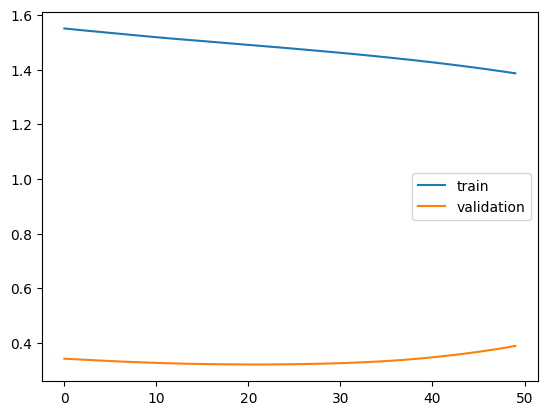

In [34]:
# Plotar o histórico de treinamento
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


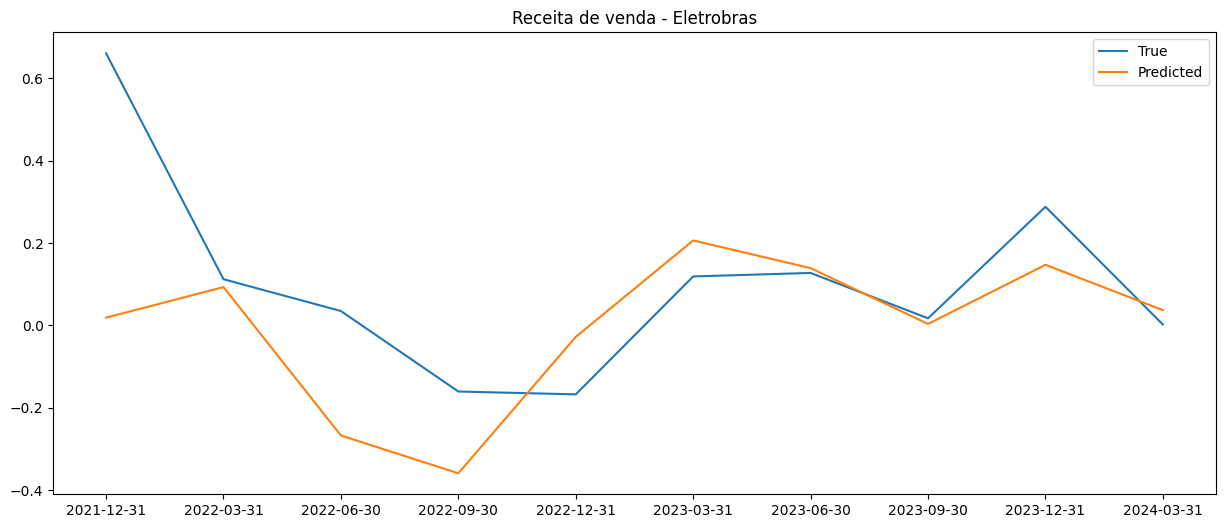

In [35]:
#plotar a previsão comparada com o valor real
y_pred = model.predict(x_test)
plt.figure(figsize=(15, 6))
plt.title('Receita de venda - Eletrobras')

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [36]:
#definir a arquitetura do modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(1))

#Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#Treinar o modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Avaliar o modelo
loss = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {loss}')

Epoch 1/50


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.5494 - val_loss: 0.2744
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 1.5475 - val_loss: 0.2760
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.5457 - val_loss: 0.2775
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.5440 - val_loss: 0.2787
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 1.5424 - val_loss: 0.2797
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.5407 - val_loss: 0.2806
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 1.5391 - val_loss: 0.2811
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.5374 - val_loss: 0.2814
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.5357 - val_loss: 0.2813
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.5340 - val_loss: 0.2809
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.5321 - val_loss: 0.2802
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1.5302 - val_loss: 0.2791
Epoch 13/50
1/

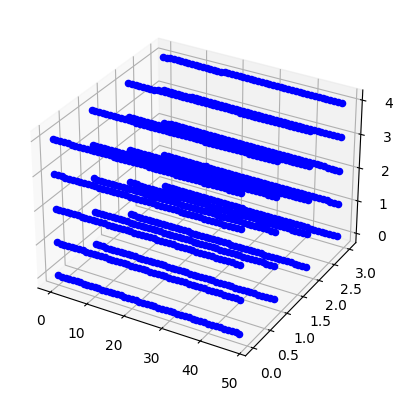

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Criando uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos da variavel x_3d_features
# Plotar os pontos da variável x_3d_features considerando as dimensões sample, feature e lag
for sample in range(x_3d_features.shape[0]):
    for feature in range(x_3d_features.shape[1]):
        for lag in range(x_3d_features.shape[2]):
            ax.scatter(sample, feature, lag, c='b', marker='o')
            
# Exibindo o gráfico
plt.show()

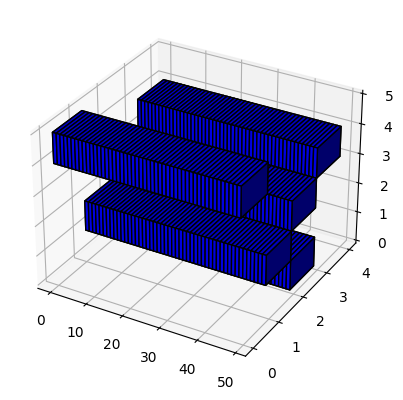

In [38]:
#visualização dos dados em 3d
import numpy as np
import matplotlib.pyplot as plt

# Criando uma figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualizando os voxels
ax.voxels(x_3d_features, facecolors='blue', edgecolor='k')

# Exibindo o gráfico
plt.show()

In [39]:
missing_values = np.shape(dict_empresas['eletrobras'])
print(f"Tamanho total da amostra de: {missing_values}")

training_set = dict_empresas['eletrobras']['Receita de venda'].iloc[:40]
testing_set = dict_empresas['eletrobras']['Receita de venda'].iloc[40:]

training_lag = create_lagged_features(4, training_set)
print(training_lag)

# Combinar as características de entrada e saída atrasadas
X = np.hstack([np.hstack(input_lagged_list), np.hstack(output_lagged_list)])
print("Matriz X criada com sucesso, shape: ", np.shape(X))

# Transformação polinomial dos dados de entrada combinados
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Dividir os dados em treinamento e teste
train_size = int(len(X_poly) * 0.8)
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = output_data[lag:train_size + lag], output_data[train_size + lag:]

# Treinar o modelo de regressão linear com os dados transformados
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Modelo criado, shape coeficientes: {np.shape(model.coef_)}")

Tamanho total da amostra de: (53, 11)


NameError: name 'create_lagged_features' is not defined

In [ ]:
soma = 53*0.8
soma

42.400000000000006

Montando modelo

Modelo SINDy

In [ ]:


# Função para criar características com termos de atraso para a simulação
def create_lagged_features_for_simulation(input_data, output_data, lag, poly, small_coef_indices):
    n = len(input_data)
    print(input_data.shape, output_data.shape)
    input_lagged = np.zeros((n - lag, lag))
    output_lagged = np.zeros((n - lag, lag))
    for i in range(lag, n):
        # print("Shape input_lagged: ", input_lagged[i - lag].shape)
        # print("Shape output_lagged: ", output_lagged[i - lag].shape)
        # print("Shape input: ", input_data[i - lag:i].shape)
        # print("Shape output: ", output_data[i - lag:i].shape)
        input_lagged[i - lag] = input_data[i - lag:i]
        output_lagged[i - lag] = output_data[i - lag:i]
    X = np.hstack([input_lagged, output_lagged])
    X_poly = poly.transform(X)
    print("Shape X_poly: ", X_poly)
    print("Shape small_coef_indices: ", small_coef_indices)
    X_poly_refined = np.delete(X_poly, small_coef_indices, axis=1)
    return X_poly_refined


#função para método de seleção de características
def sindy_model(input_data, output_data, lag):
    
    input_lagged_list = []
    output_lagged_list = []

    if isinstance(input_data, dict):
        for key, arr in input_data.items():
            input_lagged = create_lagged_features(arr.values.flatten(), lag)
            print(np.shape(input_lagged))
            input_lagged_list.append(input_lagged)
    else:
        # Criar características com termos de atraso
        input_lagged = create_lagged_features(input_data, lag)
        input_lagged_list.append(input_lagged)

    # Verificar se input_data é um DataFrame
    if isinstance(output_data, pd.DataFrame):
        
        # Loop para tratar cada coluna em input_data (excluindo o índice)
        for col in output_data.columns:
            output_lagged = create_lagged_features(output_data[col].values, lag)
            output_lagged_list.append(output_lagged)
        
    else:
        # Criar características com termos de atraso
        output_lagged = create_lagged_features(output_data, lag)
        output_lagged_list.append(output_lagged)
        
    # Combinar as características de entrada e saída atrasadas
    X = np.hstack([np.hstack(input_lagged_list), np.hstack(output_lagged_list)])
    print("Matriz X criada com sucesso, shape: ", np.shape(X))

    # Transformação polinomial dos dados de entrada combinados
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Dividir os dados em treinamento e teste
    train_size = int(len(X_poly) * 0.8)
    X_train, X_test = X_poly[:train_size], X_poly[train_size:]
    y_train, y_test = output_data[lag:train_size + lag], output_data[train_size + lag:]

    # Treinar o modelo de regressão linear com os dados transformados
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f"Modelo criado, shape coeficientes: {np.shape(model.coef_)}")
    
    # Identificar os coeficientes menores que 0.01
    small_coef_indices = np.where(np.abs(model.coef_) < 0.0001)[0]
    print(f"small_coef_indices shape: {np.shape(small_coef_indices)}")

    # Remover as colunas correspondentes aos coeficientes pequenos
    X_train_refined = np.delete(X_train, small_coef_indices, axis=1)
    X_test_refined = np.delete(X_test, small_coef_indices, axis=1)

    print(np.shape(X_train_refined))

    # Treinar um novo modelo com as componentes restantes
    model_refined = LinearRegression()
    model_refined.fit(X_train_refined, y_train)

    # Coeficientes e intercepto do modelo refinado
    coefficients_refined = model_refined.coef_
    intercept_refined = model_refined.intercept_

    # Obter os nomes das variáveis polinomiais
    poly_feature_names = poly.get_feature_names_out()

    # Remover os nomes correspondentes aos coeficientes pequenos
    feature_names_refined = np.delete(poly_feature_names, small_coef_indices)

    # Filtrar os coeficientes restantes para manter apenas os significativos
    significant_coefs = np.abs(coefficients_refined) >= 0.001
    coefficients_filtered = coefficients_refined[significant_coefs]
    feature_names_filtered = feature_names_refined[significant_coefs]

    model_refined.coef_ = model_refined.coef_ = np.where(np.abs(model_refined.coef_) < 0.01, 0, model_refined.coef_)

    # Exibir a forma matemática do modelo refinado com componentes significativos
    model_formula = f"{intercept_refined:.4f} + " + " + ".join(
        [f"{coef:.4f}*{name}" for coef, name in zip(coefficients_filtered, feature_names_filtered)])
    
    print(model_formula)


    return model_refined, poly, small_coef_indices

def free_run_simulation(lag, input_data, output_data, model_refined, poly, small_coef_indices):
    # Realizar a simulação "free run"
    y_pred_free_run = []
    #inicializar outputs com o número de lags de zeros para o "free run"
    output_sim = [0] * lag

    for i in range(lag, len(input_data)):
        X_sim = create_lagged_features_for_simulation(input_data[:i+1], np.array(output_sim), lag, poly, small_coef_indices)
        y_pred = model_refined.predict(X_sim[-1].reshape(1, -1))
        y_pred_free_run.append(y_pred[0])
        output_sim.append(y_pred[0])

    #mostrar mse
    mse = np.mean((output_data[lag:] - y_pred_free_run) ** 2)
    print(f"MSE: {mse}")

    # Plotar os resultados
    plt.plot(output_data[lag:], label='Real', color='red')
    plt.plot(y_pred_free_run, label='Predito', color='blue')
    plt.legend()
    plt.show()



In [ ]:
#3.01             Receita de Venda de Bens e/ou Serviços
#3.02              Custo dos Bens e/ou Serviços Vendidos
#3.03                                    Resultado Bruto
#3.04                     Despesas/Receitas Operacionais
#3.05  Resultado Antes do Resultado Financeiro e dos ...
#3.06                               Resultado Financeiro
#3.07         Resultado Antes dos Tributos sobre o Lucro
#3.08  Imposto de Renda e Contribuição Social sobre o...
#3.09        Resultado Líquido das Operações Continuadas
#3.10      Resultado Líquido de Operações Descontinuadas  -> Muitos zeros
#3.11              Lucro/Prejuízo Consolidado do Período
#3.99                    Lucro por Ação - (Reais / Ação)
print(np.shape(dict_empresas['tpaulista']['3.01'].values))
#ver informações sobre o dict_indices
dict_indices['ibov'].info()

KeyError: '3.01'

In [ ]:
# Definir o número de atrasos - lag de 1 ano
lag = 4 

retorno_modelo = sindy_model(dict_indices, dict_empresas['tpaulista']['3.01'].values, lag)


#free_run_simulation(lag, dict_indices['iee'].values.flatten(), dict_empresas['tpaulista']['3.01'].values, retorno_modelo[0], retorno_modelo[1], retorno_modelo[2])
# Legenda variáveis
# x0 = [uk] Valor atual da entrada
# x1 = [uk-1] Primeiro valor de atraso da entrada
# x2 = [uk-2] Segundo valor de atraso da entrada
# x3 = [uk-3] Segundo valor de atraso da entrada
# x4 = [uk-4] Segundo valor de atraso da entrada
# x4 = [yk-1] Primeiro valor de atraso da saída
# x5 = [yk-2] Segundo valor de atraso da saída
# x6 = [yk-3] Segundo valor de atraso da saída
# x7 = [yk-4] Segundo valor de atraso da saída

(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)


In [ ]:
free_run_simulation(lag, dict_indices, dict_empresas['tpaulista']['3.01'].values, retorno_modelo[0], retorno_modelo[1], retorno_modelo[2])